# World Happiness Prediction Model
# Megan Holford
DSC 630

For my class project I want to look at the World Happiness rankings from the last several years and see what kind of trends and correlations can be found in the data and if a prediction model can be built.

I am getting my dataset from: https://www.kaggle.com/mathurinache/world-happiness-report?select=2017.csv.

This has the data from the last several years and so I will be cleaning and combining it to take a look so that more data can be used for model training and testing.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score






In [2]:
happy_2015 = pd.read_csv("2015.csv")
happy_2016 = pd.read_csv("2016.csv")
happy_2017 = pd.read_csv("2017.csv")
happy_2018 = pd.read_csv("2018.csv")
happy_2019 = pd.read_csv("2019.csv")
happy_2020 = pd.read_csv("2020.csv")

We can see a summary of the data set to see what our cloums and data looks like.

In [3]:
happy_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happy_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
happy_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
happy_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
happy_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
happy_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


This is helpful to see the  data, but some of these columns are not neccessary and the columns names are different so if we want to combine the information so we have it all together, we need to address this before we can combine it. 

In [9]:
# Here, I am renaming the columns so that they will all match. All the appropriate columns will be renamed to the same thing in each different set for the years.
happy_2015 = happy_2015.rename(columns = {'Happiness Rank':'Happiness_Rank', 'Happiness Score':'Happiness_Score', 'Economy (GDP per Capita)':'GDP_per_Capita', 'Health (Life Expectancy)':'Health','Generosity':'Generosity_Score', 'Trust (Government Corruption)':'Government_Corruption'})

newhappy_2015 = happy_2015[['Country', 'Happiness_Rank', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity_Score']]
newhappy_2015.head()

,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity_Score
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [10]:
happy_2016 = happy_2016.rename(columns = {'Happiness Rank':'Happiness_Rank', 'Happiness Score':'Happiness_Score', 'Economy (GDP per Capita)':'GDP_per_Capita', 'Health (Life Expectancy)':'Health','Generosity':'Generosity_Score', 'Trust (Government Corruption)':'Government_Corruption'})

newhappy_2016 = happy_2016[['Country', 'Happiness_Rank', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity_Score']]
newhappy_2016.head()

,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity_Score
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [11]:
happy_2017 = happy_2017.rename(columns = {'Happiness.Rank':'Happiness_Rank', 'Happiness.Score':'Happiness_Score','Economy..GDP.per.Capita.':'GDP_per_Capita','Health..Life.Expectancy.':'Health','Generosity':'Generosity_Score', 'Trust..Government.Corruption.':'Government_Corruption'})

# There are some extra columns here that we do not need so we are only selecting those that we do for our new set.
newhappy_2017 = happy_2017[['Country', 'Happiness_Rank', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity_Score']]
newhappy_2017.head()

,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity_Score
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [12]:
happy_2018 = happy_2018.rename(columns = {'Overall rank':'Happiness_Rank', 'Country or region':'Country', 'Score':'Happiness_Score', 'GDP per capita':'GDP_per_Capita', 'Social support':'Family','Generosity':'Generosity_Score', 'Healthy life expectancy':'Health', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Government_Corruption'})

newhappy_2018 = happy_2018[['Country', 'Happiness_Rank', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity_Score']]
newhappy_2018.head()

,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity_Score
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [13]:
happy_2019 = happy_2019.rename(columns = {'Overall rank':'Happiness_Rank', 'Country or region':'Country', 'Score':'Happiness_Score','Generosity':'Generosity_Score', 'GDP per capita':'GDP_per_Capita', 'Social support':'Family', 'Healthy life expectancy':'Health', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Government_Corruption'})

newhappy_2019 = happy_2019[['Country', 'Happiness_Rank', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity_Score']]
newhappy_2019.head()

,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity_Score
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322


In [14]:
# Our data for 2020 does not have ranking, so we need to create this column as our others do have this important variable.
happy_2020['Happiness_Rank'] = happy_2020.index + 1 

# The data for this year also has different values for the different scoring variables. The raw data is put in under the variable and then the weighed value for the overall score is put in under the 'Explained by:' variables.
# We want to use those 'Explained by:' variables as they are comparable to the previous years data.
happy_2020 = happy_2020.rename(columns = {'Country name':'Country', 'Ladder score':'Happiness_Score', 'Explained by: Log GDP per capita':'GDP_per_Capita', 'Explained by: Social support':'Family', 'Explained by: Healthy life expectancy':'Health', 'Explained by: Freedom to make life choices':'Freedom','Explained by: Generosity':'Generosity_Score', 'Explained by: Perceptions of corruption':'Government_Corruption'})

# There are also some extra columns that we will not need for merging all the datasets together. Here we are only selecting the columns that we need for the clean set. 
newhappy_2020 = happy_2020[['Country', 'Happiness_Rank', 'Happiness_Score',"GDP_per_Capita", 'Family', 'Health', 'Freedom', 'Government_Corruption', 'Generosity_Score']]
newhappy_2020.head()

,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity_Score
0,Finland,1,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670
1,Denmark,2,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793
2,Switzerland,3,7.5599,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056
3,Iceland,4,7.5045,1.326502,1.547567,1.000843,0.661981,0.144541,0.362330
4,Norway,5,7.4880,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985


In [15]:
dataframes = [newhappy_2015, newhappy_2016, newhappy_2017, newhappy_2018, newhappy_2019, newhappy_2020]
full_happy = pd.concat(dataframes)
full_happy = full_happy.reset_index()
print(full_happy)

     index                   Country  Happiness_Rank  Happiness_Score  \
0        0               Switzerland               1           7.5870   
1        1                   Iceland               2           7.5610   
2        2                   Denmark               3           7.5270   
3        3                    Norway               4           7.5220   
4        4                    Canada               5           7.4270   
..     ...                       ...             ...              ...   
930    148  Central African Republic             149           3.4759   
931    149                    Rwanda             150           3.3123   
932    150                  Zimbabwe             151           3.2992   
933    151               South Sudan             152           2.8166   
934    152               Afghanistan             153           2.5669   

     GDP_per_Capita    Family    Health   Freedom  Government_Corruption  \
0          1.396510  1.349510  0.941430  0.6655

Now that we have our data set combined, we can look at some early graphs to see what we are able to discern before continuing to clean the data and finding what we want to use for our models. Since this report is a yearly report that is widely used, there may not be much cleaning for filling in for missing values, but making sure we can use the data all together will be the main goal. 

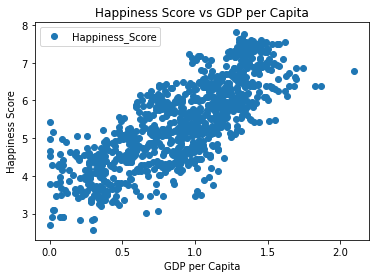

In [16]:
full_happy.plot(x='GDP_per_Capita', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs GDP per Capita')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')
plt.show()

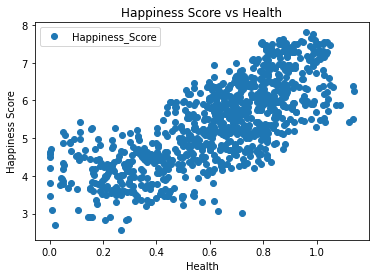

In [17]:
full_happy.plot(x='Health', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs Health')  
plt.xlabel('Health')  
plt.ylabel('Happiness Score')
plt.show()

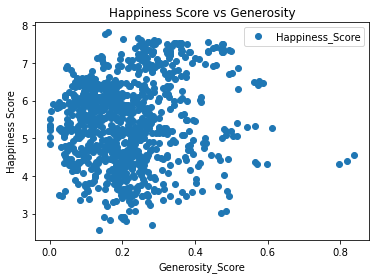

In [18]:
full_happy.plot(x='Generosity_Score', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs Generosity')  
plt.xlabel('Generosity_Score')  
plt.ylabel('Happiness Score')
plt.show()

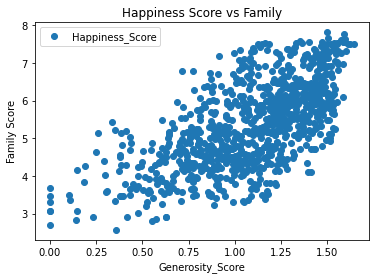

In [19]:
full_happy.plot(x='Family', y='Happiness_Score', style='o')  
plt.title('Happiness Score vs Family')  
plt.xlabel('Generosity_Score')  
plt.ylabel('Family Score')
plt.show()

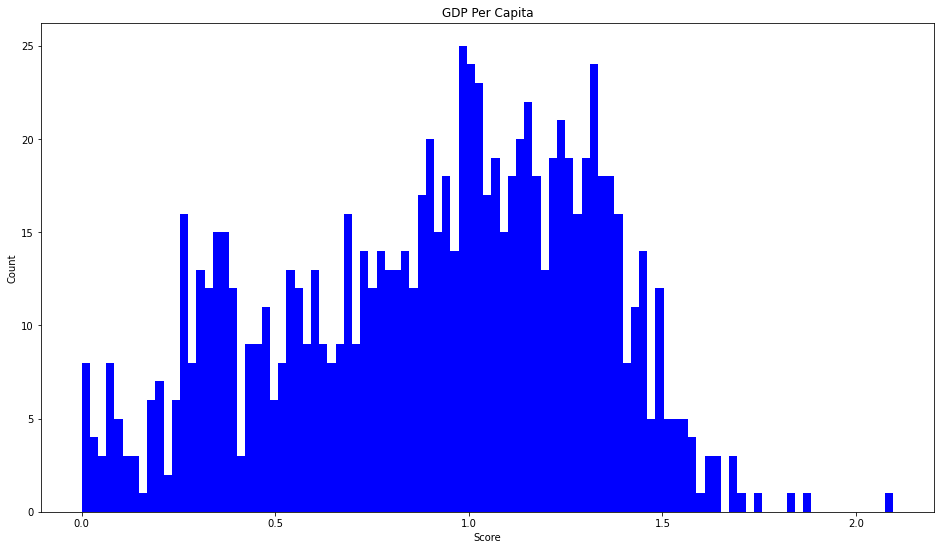

In [20]:
plt.figure(figsize=(16, 9))
plt.hist(full_happy.GDP_per_Capita, bins = 99, color = "blue")
plt.title("GDP Per Capita");
plt.xlabel("Score");
plt.ylabel("Count");
plt.plot();

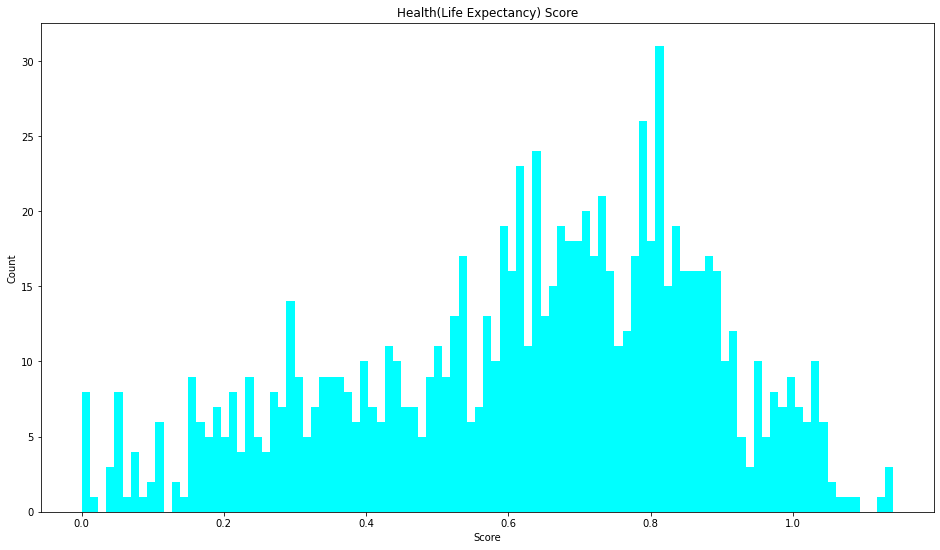

In [21]:
plt.figure(figsize=(16, 9))
plt.hist(full_happy.Health, bins = 99, color = "cyan")
plt.title("Health(Life Expectancy) Score");
plt.xlabel("Score");
plt.ylabel("Count");
plt.plot();

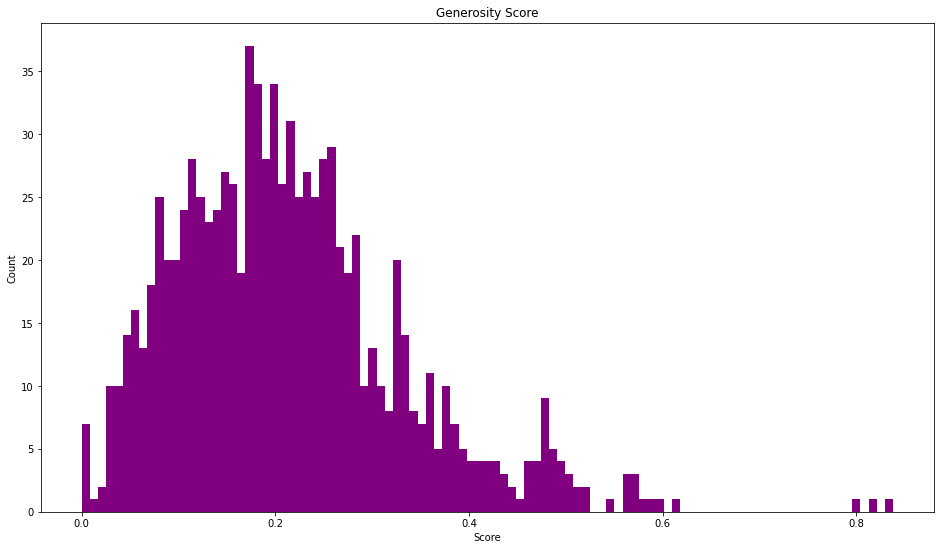

In [22]:
plt.figure(figsize=(16, 9))
plt.hist(full_happy.Generosity_Score, bins = 99, color = "purple")
plt.title("Generosity Score");
plt.xlabel("Score");
plt.ylabel("Count");
plt.plot();

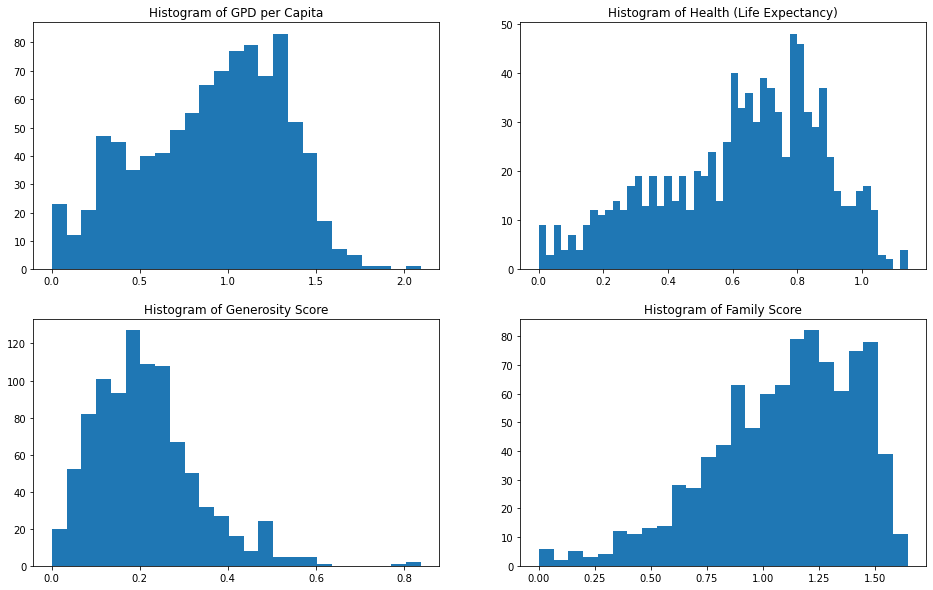

In [23]:

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(16,10))
ax1.hist(full_happy['GDP_per_Capita'], bins = 25)
ax1.title.set_text('Histogram of GPD per Capita')

ax2.hist(full_happy['Health'], bins = 50)
ax2.title.set_text("Histogram of Health (Life Expectancy)")

ax3.hist(full_happy['Generosity_Score'], bins = 25)
ax3.title.set_text('Histogram of Generosity Score')

ax4.hist(full_happy['Family'], bins = 25)
ax4.title.set_text('Histogram of Family Score')


These graphs give us a visual of how certain factors compare with the overall happiness score. From the scatter plots, we can see there are some correlations already. We can do a correlation map to see even more. 

In [24]:
# Spearman's correlation also works better for data with more non-linear relationships, so we will use 
# Spearman's correlation to try and look closer at our data and the relationships.

spearman_cormatrix= full_happy.corr(method='spearman')
spearman_cormatrix

,index,Happiness_Rank,Happiness_Score,GDP_per_Capita,Family,Health,Freedom,Government_Corruption,Generosity_Score
index,1.000000,0.999999,-0.998280,-0.803609,-0.665764,-0.759235,-0.546732,-0.275025,-0.110363
Happiness_Rank,0.999999,1.000000,-0.998279,-0.803637,-0.665682,-0.759244,-0.546657,-0.275019,-0.110400
Happiness_Score,-0.998280,-0.998279,1.000000,0.801433,0.665561,0.764850,0.548586,0.274696,0.110160
GDP_per_Capita,-0.803609,-0.803637,0.801433,1.000000,0.604700,0.790142,0.362238,0.223193,-0.009274
Family,-0.665764,-0.665682,0.665561,0.604700,1.000000,0.616856,0.446754,0.061301,-0.048266
Health,-0.759235,-0.759244,0.764850,0.790142,0.616856,1.000000,0.388088,0.165229,-0.012318
Freedom,-0.546732,-0.546657,0.548586,0.362238,0.446754,0.388088,1.000000,0.415933,0.311099
Government_Corruption,-0.275025,-0.275019,0.274696,0.223193,0.061301,0.165229,0.415933,1.000000,0.265325
Generosity_Score,-0.110363,-0.110400,0.110160,-0.009274,-0.048266,-0.012318,0.311099,0.265325,1.000000


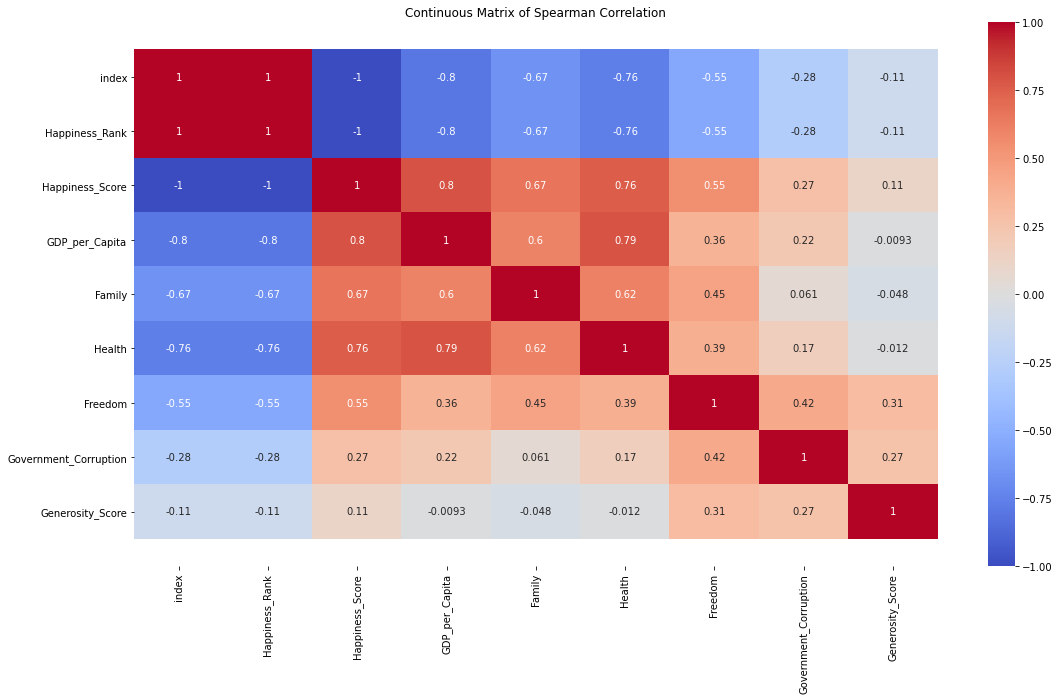

In [25]:
plt.figure(figsize=(18,10))
ax = sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, 
            center=0, cmap="coolwarm", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Continuous Matrix of Spearman Correlation");

Here, we can see all the values and which ones have the strongest correleations and which do not have much of an impact on the overall happiness score. This can help us to see what might have the strongest impact on the happiness score when creating the prediction model. 

After the inital analysis, we can see that some values do have more correlation with the overall happiness score, but we can see that some values, while not heavy correlated, could still have an impact, so we will want to keep those values in when working with the data to get the overall picture. But the country and the happiness rank are not needed for the model and further analysis, since we will just be looking at the relationship between the data for our model so we can drop those columns. Depending on the analysis that is being done, keeping the country may be important, but for this analysis, we will drop it as it should not have an effect on the data.

Now that we have cleaned up our data set a bit more, we can look into the data and the happiness scores a bit further. One thing that can help us to gain some insight will be binning the data. We can take the overall happiness scores and see how it avarages out across the dataset.

In [26]:
# Use NumPy's linspace to partition the values into three categories

happy_bin = np.linspace(min(full_happy["Happiness_Score"]), max(full_happy["Happiness_Score"]), 4)
happy_bin

array([2.56690001, 4.3141667 , 6.06143339, 7.80870008])

In [27]:
# We will create names for our bins of low,medium, and high to bin the happiness scores. 
bins = ["Low", "Medium", "High"]



In [28]:
full_happy["binned"] = pd.cut(full_happy["Happiness_Score"], happy_bin, labels=bins, include_lowest=True)

print(full_happy[["Happiness_Score", "binned"]])

     Happiness_Score binned
0             7.5870   High
1             7.5610   High
2             7.5270   High
3             7.5220   High
4             7.4270   High
..               ...    ...
930           3.4759    Low
931           3.3123    Low
932           3.2992    Low
933           2.8166    Low
934           2.5669    Low

[935 rows x 2 columns]


Text(0.5, 1.0, 'Happiness Bins')

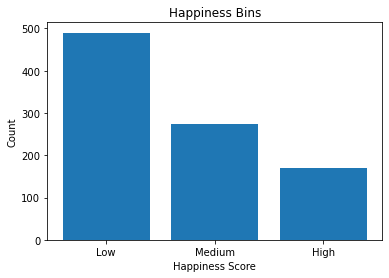

In [29]:
# Create a visualization of our results from the binning process

plt.bar(bins, full_happy["binned"].value_counts())

# Add labels and a title

plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.title("Happiness Bins")

We can see from our graph that there are a lot more countries in the Low bin versus the High bin for happiness score, so this tells us that the number of high ranking happiness scores in the data is not as common as low scores are.

Now we can look at how some of the variables relate to each other.

(0.0, 1.2951276991407534)

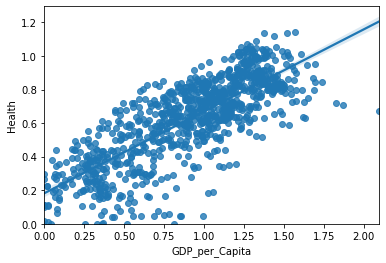

In [30]:
# Scatterplot of GDP and Health.Both of these variables are strongly correlated with the overall happiness score, but
# how much are they related?

sns.regplot(x = "GDP_per_Capita", y = "Health", data = full_happy)
plt.ylim(0,)

In [31]:
full_happy[["GDP_per_Capita", "Health"]].corr()



,GDP_per_Capita,Health
GDP_per_Capita,1.000000,0.782037
Health,0.782037,1.000000


This shows that Health and GDP scores in the data do have a correlation, backing up what our heatmap earlier showed us.

GDP and Health do have a correlation together of 78%. That is not an astoundingly strong correlation but it does give us insight that the higher a countries GDP score is, the higher the life expectancy and overall health is of the citizens. Let's look at a few more. 

(0.0, 0.7602000000000001)

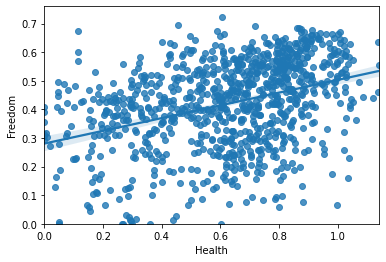

In [32]:
sns.regplot(x = "Health", y = "Freedom", data = full_happy)
plt.ylim(0,)

In [33]:
full_happy[["Health", "Freedom"]].corr()



,Health,Freedom
Health,1.000000,0.367014
Freedom,0.367014,1.000000


As we can see from the graph and the chart, Health and Freedom do not have a strong correlation, only 37%.

We can see that some of the factors do have a correlations with each other, but we want to really look at their relationship with the overall happiness score and which values can be used to make the best predictions based on the previous years data. 

In [34]:
# Importing libraries to build a linear regression model.

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from numpy import mean, std



In [35]:
X= full_happy[['GDP_per_Capita','Family','Health', 'Freedom', 'Government_Corruption', 'Generosity_Score']]
X.shape

(935, 6)

In [36]:
y=full_happy[['Happiness_Score']]
y.shape

(935, 1)

In [37]:
full_happy = full_happy.reset_index()



In [38]:
# This will check our data for missing values. 

full_happy.isnull().sum()



level_0                  0
index                    0
Country                  0
Happiness_Rank           0
Happiness_Score          0
GDP_per_Capita           0
Family                   0
Health                   0
Freedom                  0
Government_Corruption    1
Generosity_Score         0
binned                   0
dtype: int64

In [39]:
for col in full_happy.columns:
  print(col,  ': %.2f%%' %((full_happy[col].isnull().sum()/full_happy.shape[0])*100))

level_0 : 0.00%
index : 0.00%
Country : 0.00%
Happiness_Rank : 0.00%
Happiness_Score : 0.00%
GDP_per_Capita : 0.00%
Family : 0.00%
Health : 0.00%
Freedom : 0.00%
Government_Corruption : 0.11%
Generosity_Score : 0.00%
binned : 0.00%


As we can see, we do not have many missing values at all (only one in Government Corruption), so this should not affect the models too much. This is not surprising as this data has become highly standard over the last few years since so many use it.

In [40]:
# Splitting the data to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)



In [41]:
# This will fill that missing value with the mean of the data for that column.

X_train = X_train.fillna(X_train.mean())




<b> Linear Regression</b>

In [42]:
# Getting the R2 cross score from our training sets.

lr= LinearRegression()

lr.fit(X_train, y_train)
y_predict= lr.predict(X_test)


lr_scores=cross_val_score(lr,X_train,y_train,scoring='r2',cv=5)
lr_scores
print('Training R2:',np.mean(lr_scores))

# Getting the R2 score from our test sets.

print("Test R2:")
print(lr.score(X_test, y_test))

Training R2: 0.7521051525813867
Test R2:
0.7607134172909658


The test and train score for the linear regression model are close at 75% for train and 77% for test.


<b>Random Forest</b>


In [43]:
# Importing additional library for Random Forest

from sklearn.ensemble import RandomForestRegressor

In [44]:
rfr=RandomForestRegressor(n_estimators=10)

rfr.fit(X_train, np.ravel(y_train,order='C'))

RandomForestRegressor(n_estimators=10)

In [45]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [46]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9633882105707343
Mean Squared Error (MSE) 	: 0.04675885676737219



In [47]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7989974149135673
Mean Squared Error (MSE) 	: 0.24621401801578488



The train set (R2= 96) for Random Forest performed significantly better than the test set(R2= 77). This score is very close to the Linear Regression score.

We can see if adding more trees improves the score.

In [48]:
# Here we will set our Random Forest model to run with 100 trees. Typically, the more trees, the better the 
# results so we can see if more trees helps our model to improve. 

rfr2=RandomForestRegressor(n_estimators=100)

rfr2.fit(X_train, np.ravel(y_train,order='C'))

RandomForestRegressor()

In [49]:
y_train2_pred = rfr2.predict(X_train)
y_test2_pred = rfr2.predict(X_test)

In [50]:
# Checking the fit of the model on training set
print("Fit of Model             \tTraining Set")
print("R^2 Score)               \t:", rfr2.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train2_pred))
print()

Fit of Model             	Training Set
R^2 Score)               	: 0.9740097890539225
Mean Squared Error (MSE) 	: 0.033193475924724845



In [51]:
# Check the Goodness of Fit (on Test Data)
print("Fit of Model             \tTest Set")
print("R^2 Score                \t:", rfr2.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test2_pred))
print()

Fit of Model             	Test Set
R^2 Score                	: 0.8182848019527986
Mean Squared Error (MSE) 	: 0.22258832654563449



We can see that by adding more trees, our model did improve ( Training= 97 and Test= 82), though the training and test results are still skewed. Random forest regression is great for classification and regression, but it does have some limitations and is not the best when looking to extrapolate unknown values using predicitive analytics. This may be why our training and testing scores vary so much.


In [52]:
# Here we will set our Random Forest model to run with 10000 trees. Typically, the more trees, the better the 
# results so we can see if more trees helps our model to improve. 

rfr3=RandomForestRegressor(n_estimators=10000)

rf_model= rfr3.fit(X_train, np.ravel(y_train,order='C'))





In [53]:
y_train3_pred = rfr3.predict(X_train)
y_test3_pred = rfr3.predict(X_test)

In [54]:
# Checking the fit of the model on training set
print("Fit of Model             \tTraining Set")
print("R^2 Score)               \t:", rfr3.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train3_pred))
print()

Fit of Model             	Training Set
R^2 Score)               	: 0.9748209369859469
Mean Squared Error (MSE) 	: 0.032157515908513255



In [55]:
# Check the Goodness of Fit (on Test Data)
print("Fit of Model             \tTest Set")
print("R^2 Score                \t:", rfr3.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test3_pred))
print()

Fit of Model             	Test Set
R^2 Score                	: 0.8220265668407188
Mean Squared Error (MSE) 	: 0.21800492794342713



Adding more trees did not improve the test score by much (81% accuracy with 100 vs 82% accuracy with 10,000), but even still, Random Forest has still has performed better than the linear regression model so this Random Forest model is what I will be using for the happiness score predictions. We can use these test scores to see how the predicted scores compare to the actual scores. 

In [56]:
rf_model.fit(X_train,y_train.values.ravel())
y_pred_rf = rf_model.predict(X_test)


In [57]:
comp_rf = pd.DataFrame(y_test)
comp_rf['RF Predicted Score']= y_pred_rf

In [58]:
comp_rf.columns = ['Actual Happiness Score','RF Predicted Score']
comp_rf.head(30)

,Actual Happiness Score,RF Predicted Score
321,7.3160,7.188211
70,5.4770,5.317565
209,5.9560,4.735064
549,5.3580,5.840924
712,5.2470,5.538325
96,4.8980,4.380109
467,3.3490,4.347665
86,5.1230,4.892685
531,5.7520,5.544323
327,7.0060,7.030900


Here we can see a comparison of the actual score versus the predicted score. Most of the scores are within 0.4 of the actual score, but it can be off by up to a whole point. 